# **3. Analytical Approach**

## 3.1 EDA (Exploratory Data Analysis)

### 3.1.1 Import libraries dan Dataset

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import warnings

In [2]:
#Load Dataset
Data = pd.read_csv('AutoInsurance.csv')
Data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# convert 'Effective To Date' to datetime
Data['Month'] = pd.DatetimeIndex(Data['Effective To Date']).month
Data['Month'] = Data['Month'].astype(str)

### 3.1.2 Define Numerical and Categprical Column from Dataset

In [4]:
# Define numerical & categorical features
numerical_features = [feature for feature in Data.columns if ((Data[feature].dtypes != 'O') )]
categorical_features = [feature for feature in Data.columns if ((Data[feature].dtypes == 'O'))]
categorical_features

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Month']

In [5]:
numerical_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [6]:
# Explore categorical features to see how many category in each features
Data.describe(include=['O']) 

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Month
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3,12
top,UQ87917,California,No,Basic,Bachelor,10/1/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,1
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424,3356


In [7]:
Data[numerical_features].describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 3.1.3 Distributon for Numerical Features and Nornal Distribution Test

In [8]:
warnings.filterwarnings("ignore")

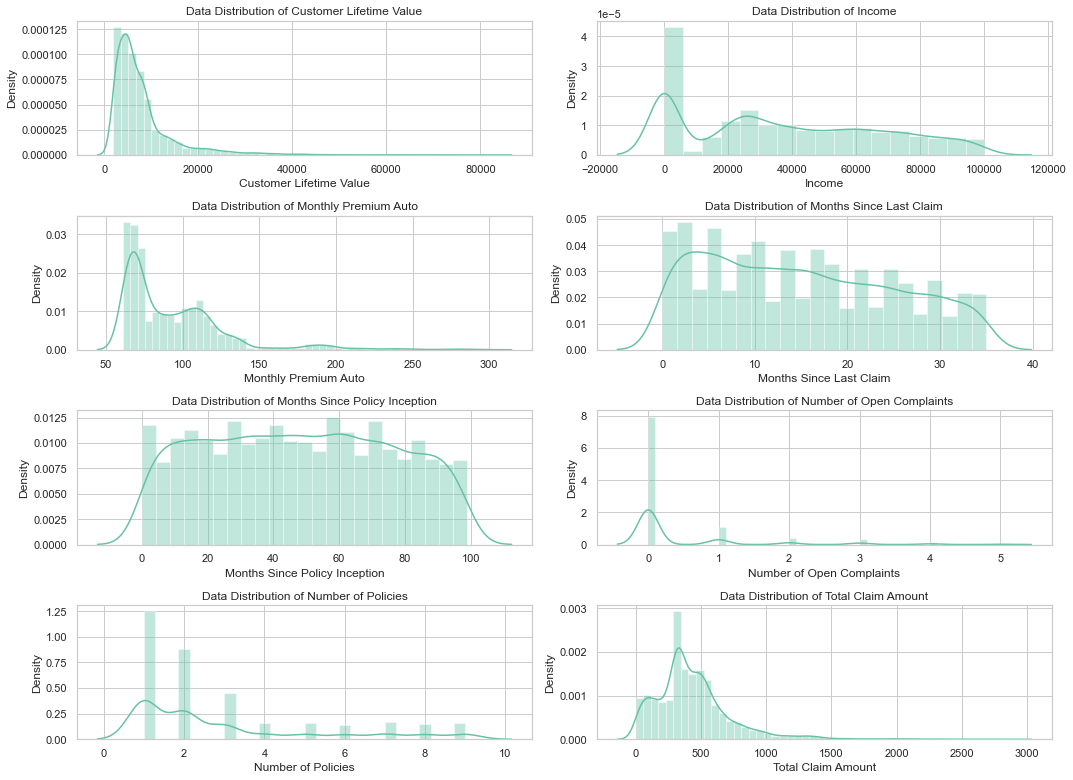

In [9]:
# Distribution Data for Numerical Features

plt.figure(figsize=(15, 11))
sns.set(style='whitegrid', palette='Set2')

numerical_codes = {}

for i in range(len(numerical_features)):
    numerical_codes[numerical_features[i]] = i

for features, i in numerical_codes.items():
    plt.subplot(4, 2, i+1)
    plt.title('Data Distribution of '+ features)
    sns.distplot(Data[features])


plt.tight_layout()

In [10]:
# Perform normality test for numerical features to check data distribution
from scipy import stats

num = 0

for i in numerical_features:
    k2, p = stats.normaltest(Data[i])
    alpha = 0.05
    
    num += 1
    print(f'{num}. p-value {i} = {p}')
    
    if p < alpha:
        print('The null hypothesis can be rejected')
        print()
    else:
        print('The null hypothesis cannot be rejected')
        print()

1. p-value Customer Lifetime Value = 0.0
The null hypothesis can be rejected

2. p-value Income = 0.0
The null hypothesis can be rejected

3. p-value Monthly Premium Auto = 0.0
The null hypothesis can be rejected

4. p-value Months Since Last Claim = 0.0
The null hypothesis can be rejected

5. p-value Months Since Policy Inception = 0.0
The null hypothesis can be rejected

6. p-value Number of Open Complaints = 0.0
The null hypothesis can be rejected

7. p-value Number of Policies = 0.0
The null hypothesis can be rejected

8. p-value Total Claim Amount = 0.0
The null hypothesis can be rejected



Summary :
1. Based on normality test, numeric feature has a non-normal data distribution
2. Seen on the diagram, data distribution of "Customer Lifetime Value' and 'Total Claim Amount' are left skew

### 3.1.4 Count every value in Categorical Features

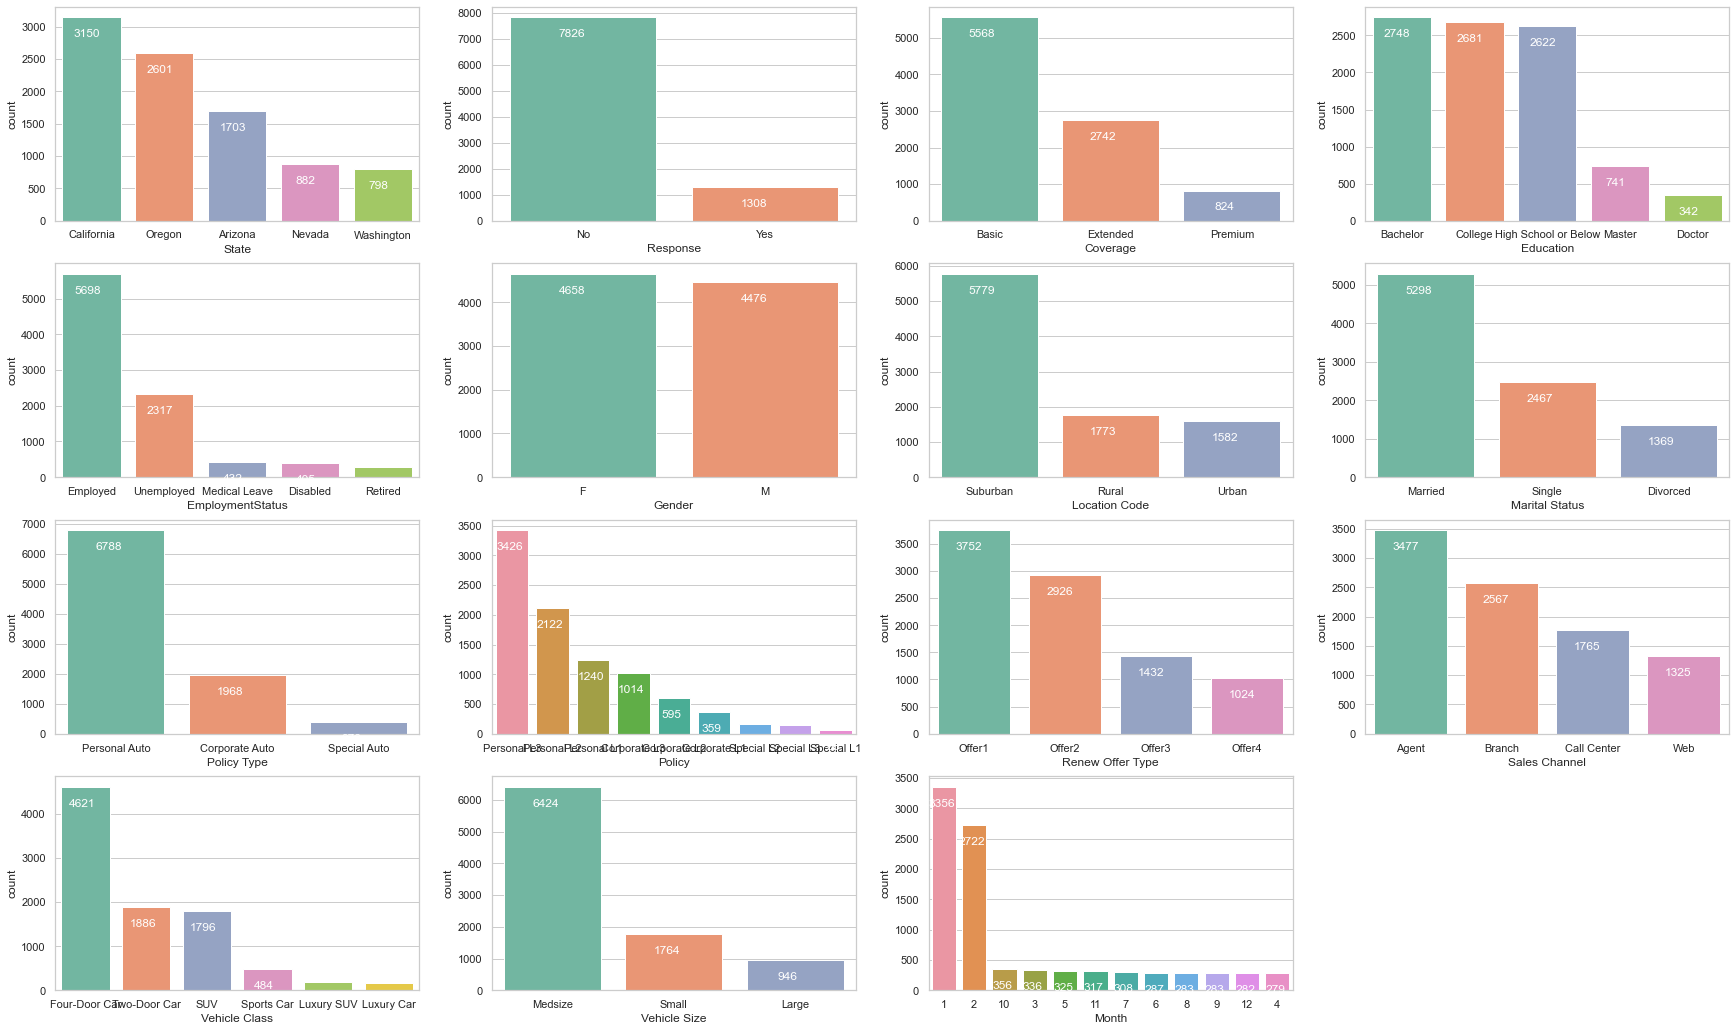

In [11]:
# Count Data for Categorical Features

categorical_features = ['State','Response','Coverage','Education','EmploymentStatus', 'Gender',
'Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size','Month']

plt.figure(figsize=(30, 70), facecolor='white')
sns.set(style='whitegrid', palette='Set2')
plotnumber = 1

for categorical_feature in categorical_features:
    ax = plt.subplot(15, 4, plotnumber)
    sns.countplot (x = categorical_feature , data = Data, order = Data[categorical_feature].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.34, p.get_height()-1), ha='center', va='top', color='white', size=12)
    plt.xlabel(categorical_feature)
    plotnumber += 1
plt.show()

In [12]:
numfeature = ['Customer Lifetime Value', 'Monthly Premium Auto','Income','Months Since Policy Inception','Number of Open Complaints','Total Claim Amount']

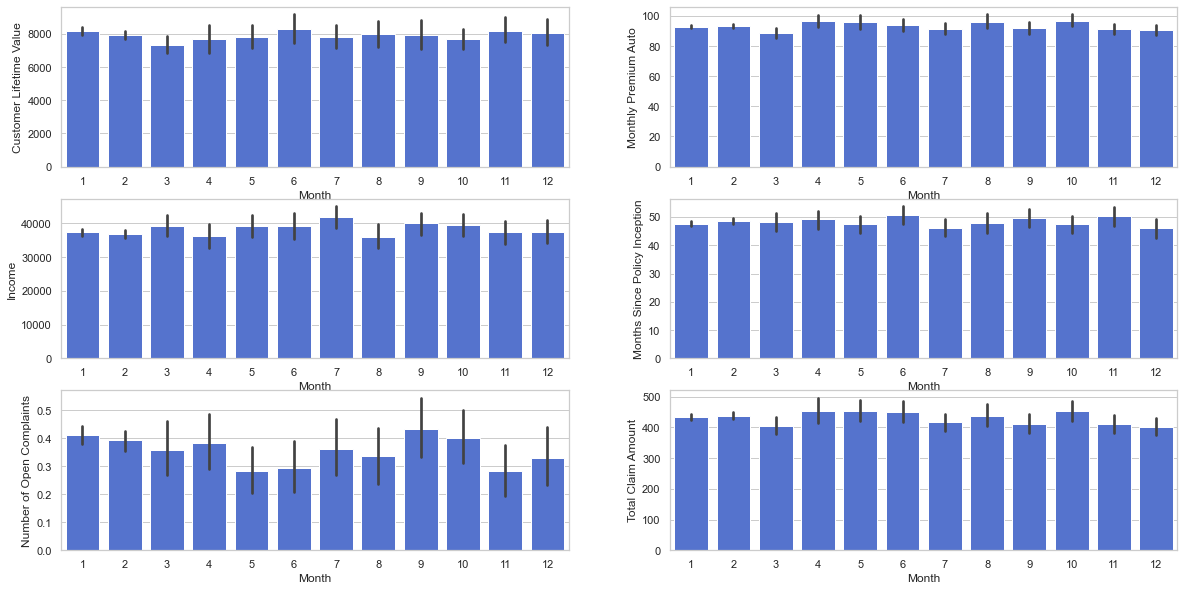

In [13]:
#Correlation between Month and Numerical Features
order = ['1','2','3','4','5','6','7','8','9','10','11','12']
plt.figure(figsize=(20, 10), facecolor='white')
i = 0
plotnumber =1
for fitur in numfeature:
    plt.subplot(3, 2, plotnumber)
    sns.barplot(data = Data, x = 'Month', y = numfeature[i] , order = order,color='royalblue')
    plotnumber+=1
    i+=1
plt.show()

Summary :
1. If Effective Date data is sliced every month, therre is no effect of month in each of the numerical column/feature
2. If estimator plot is changed to sum, then it is definite that Jan and Feb are the most frequent because these months represent more than 60%

### 3.1.5 Correlation with scatterplot

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Open Complaints'>

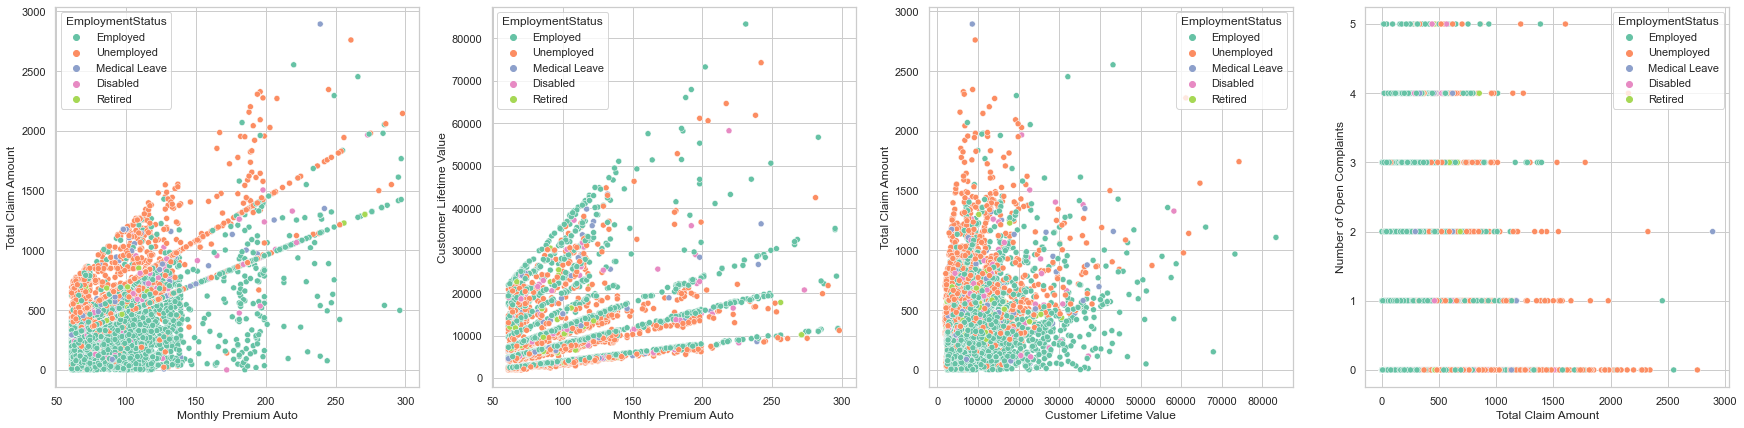

In [14]:
#Correlation between numerical features and Employment Status

x = 'EmploymentStatus'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Open Complaints'>

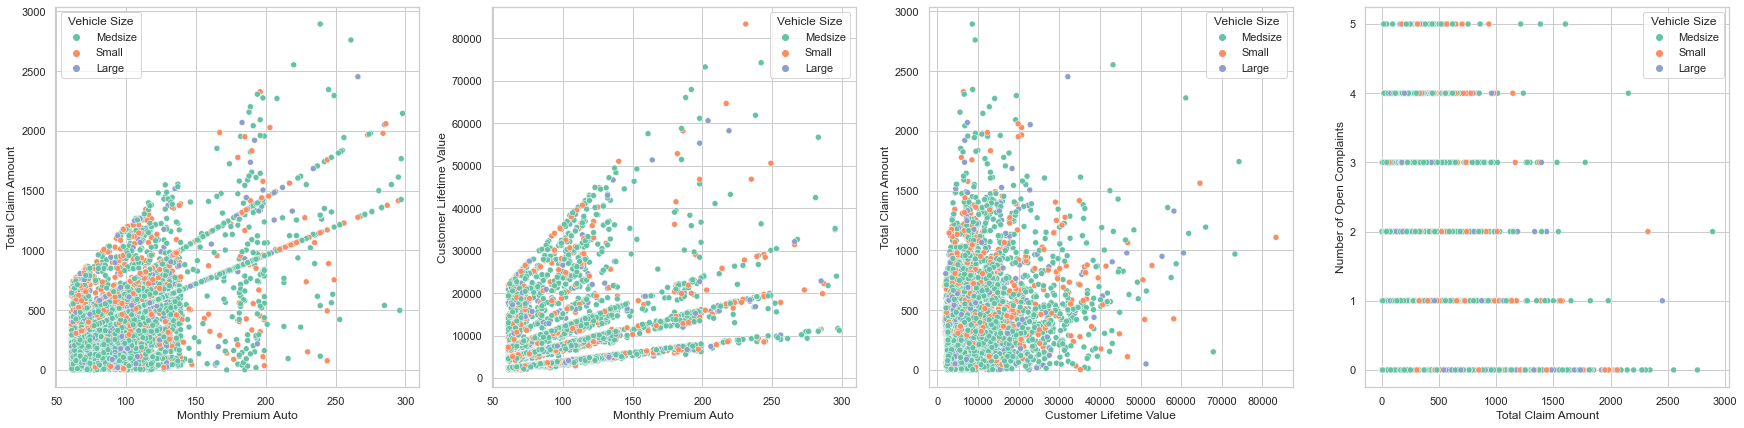

In [15]:
#Correlation between numerical features and Vehicle Size

x = 'Vehicle Size'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Total Claim Amount'>

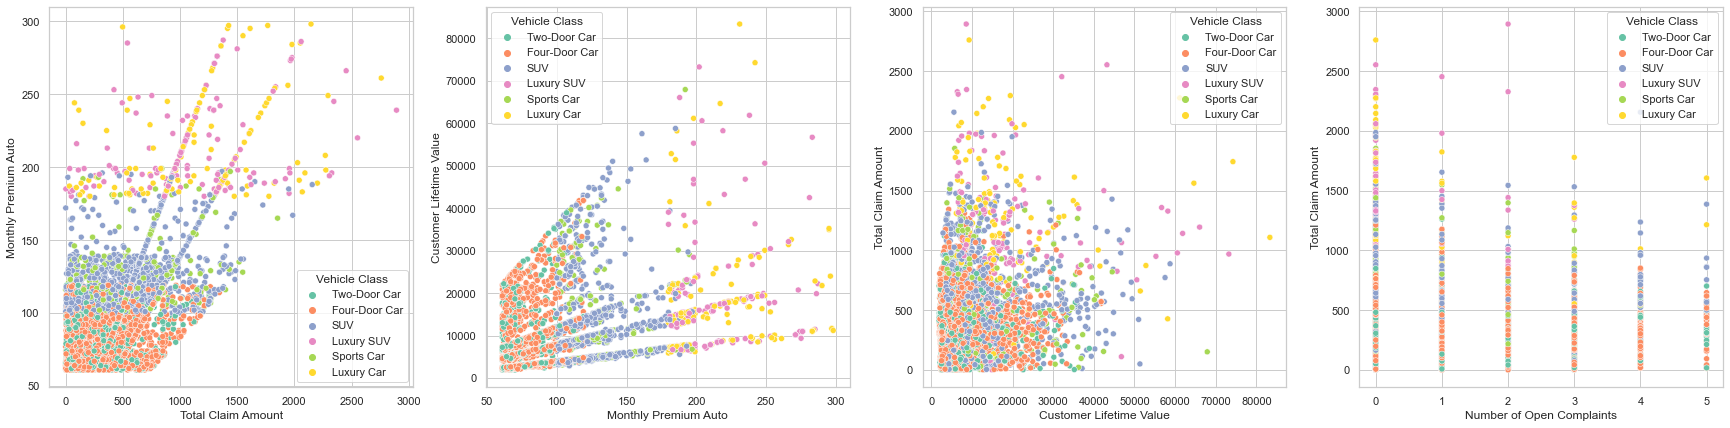

In [16]:
#Correlation between numerical features and Vehicle Class

x = 'Vehicle Class'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Total Claim Amount", y="Monthly Premium Auto", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Number of Open Complaints", y='Total Claim Amount', data=Data, ax= ax4,hue = x)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Open Complaints'>

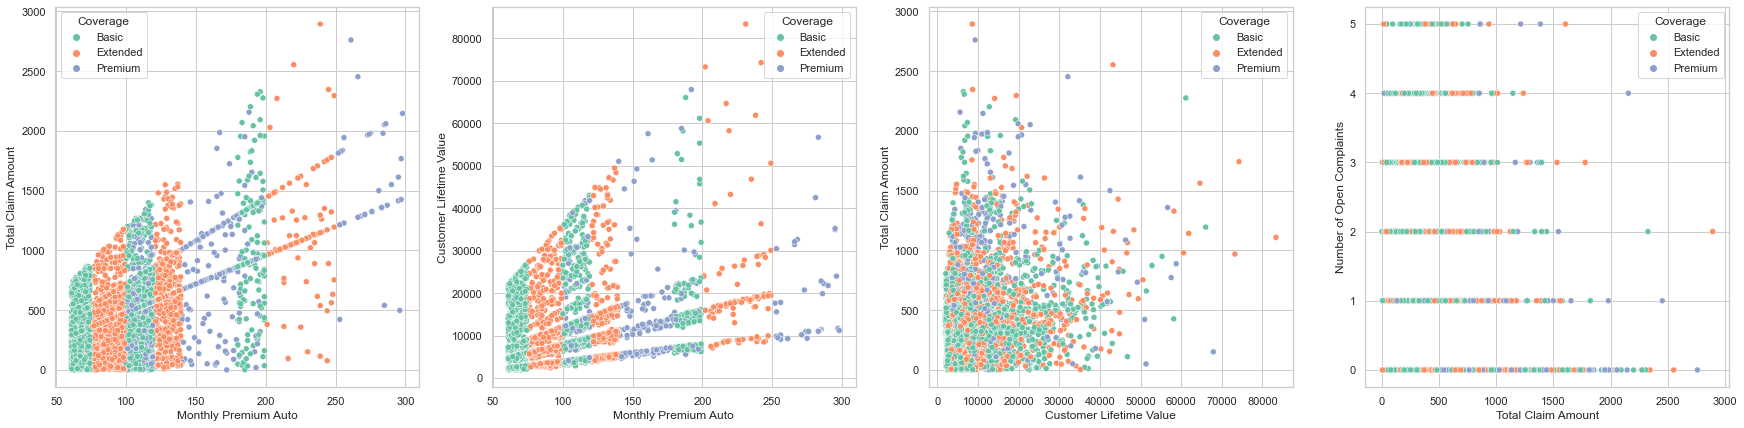

In [17]:
# Correlation between numerical features and Coverage
x = 'Coverage'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Open Complaints'>

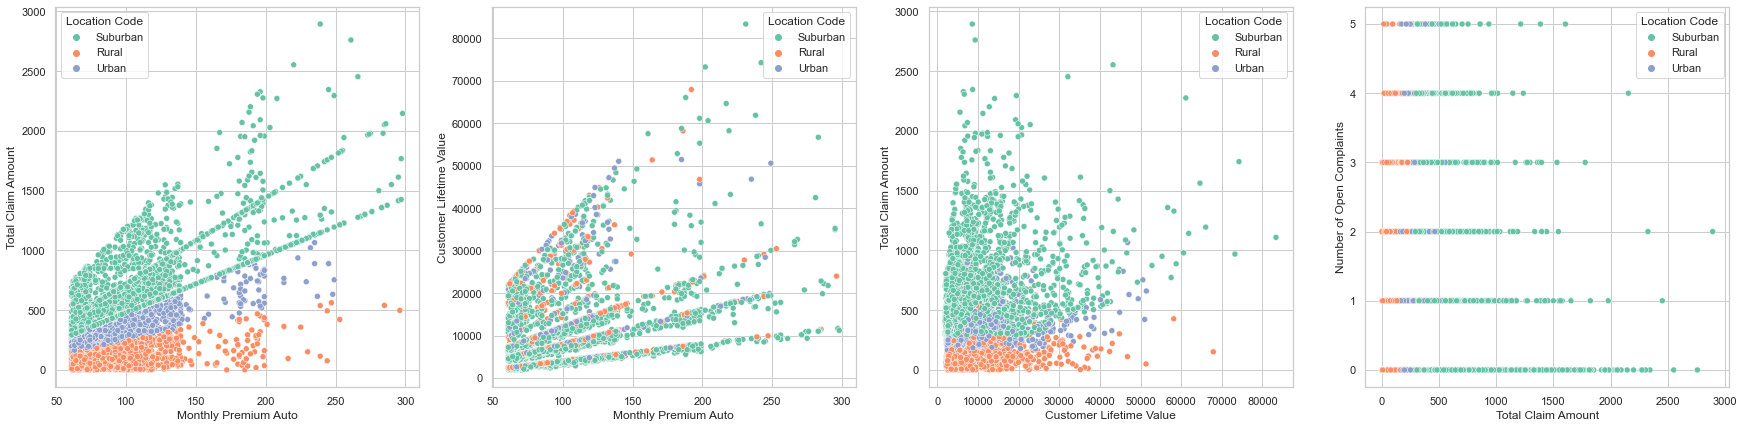

In [18]:
# Correlation between numerical features and Location Code
x = 'Location Code'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Open Complaints'>

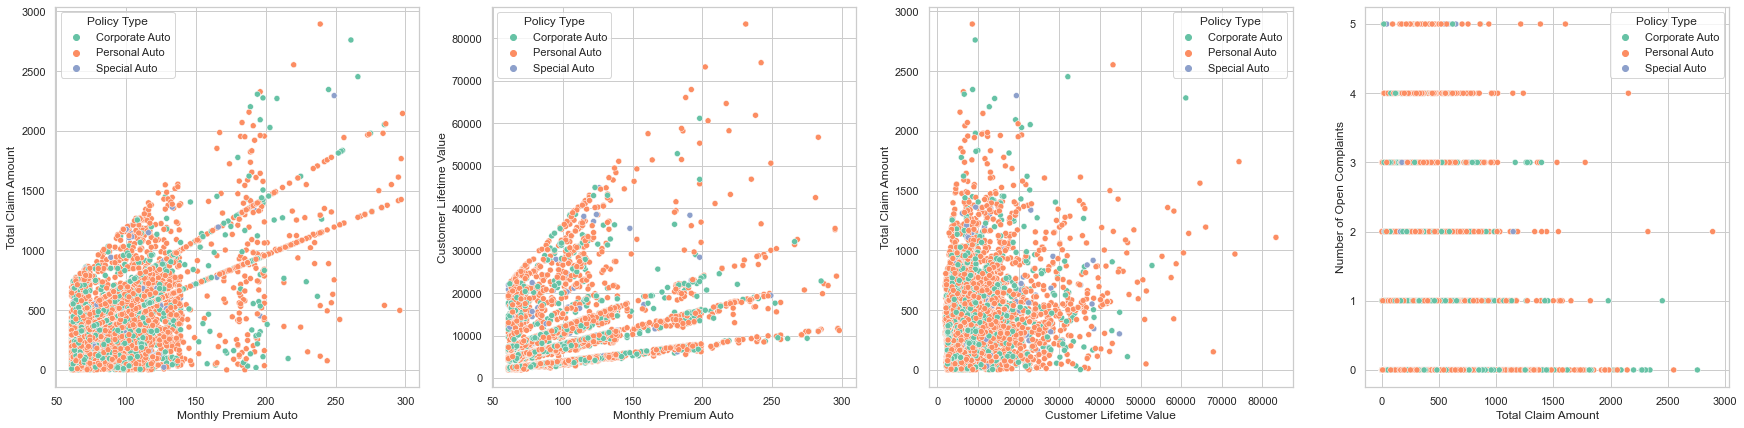

In [19]:
# Correlationn between numerical features and Policy Type

x = 'Policy Type'

plt.figure(figsize = (30, 7))
ax1 = plt.subplot(1,4,1)
sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", data=Data, ax= ax1, hue = x)
ax2 = plt.subplot(1,4,2)
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=Data, ax= ax2,hue = x)
ax3 = plt.subplot(1,4,3)
sns.scatterplot(x="Customer Lifetime Value", y="Total Claim Amount", data=Data, ax= ax3,hue = x)
ax4 = plt.subplot(1,4,4)
sns.scatterplot(x="Total Claim Amount", y='Number of Open Complaints', data=Data, ax= ax4,hue = x)

Scatter plot summary:

1. Unemployed is inclined to have more amount in terms of Total Claim Amount and Monthly Premium compared to employed   
2. Vehicle Class with luxury segment, both Luxury Car and Luxury SUV tend to have more monthly premium compared to other Vehicle Class
3. Suburban is inclined to have more amount in terms of Total Claim Amount and Monthly Premium compared to rural or urban 
4. Segmentation is visible from coverage vs monthly premium auto, it is evident there is a range for each coverage but not yet identified the cause of this segmentation

In [20]:
Data.groupby(['Vehicle Class','Coverage'])['Monthly Premium Auto'].agg('mean')

Vehicle Class  Coverage
Four-Door Car  Basic        67.515564
               Extended     87.372773
               Premium     109.893617
Luxury Car     Basic       188.760870
               Extended    225.714286
               Premium     279.500000
Luxury SUV     Basic       190.627660
               Extended    222.593750
               Premium     271.576923
SUV            Basic       109.311549
               Extended    129.782609
               Premium     167.060000
Sports Car     Basic       109.832192
               Extended    131.110345
               Premium     168.234043
Two-Door Car   Basic        67.386248
               Extended     87.788043
               Premium     110.544872
Name: Monthly Premium Auto, dtype: float64

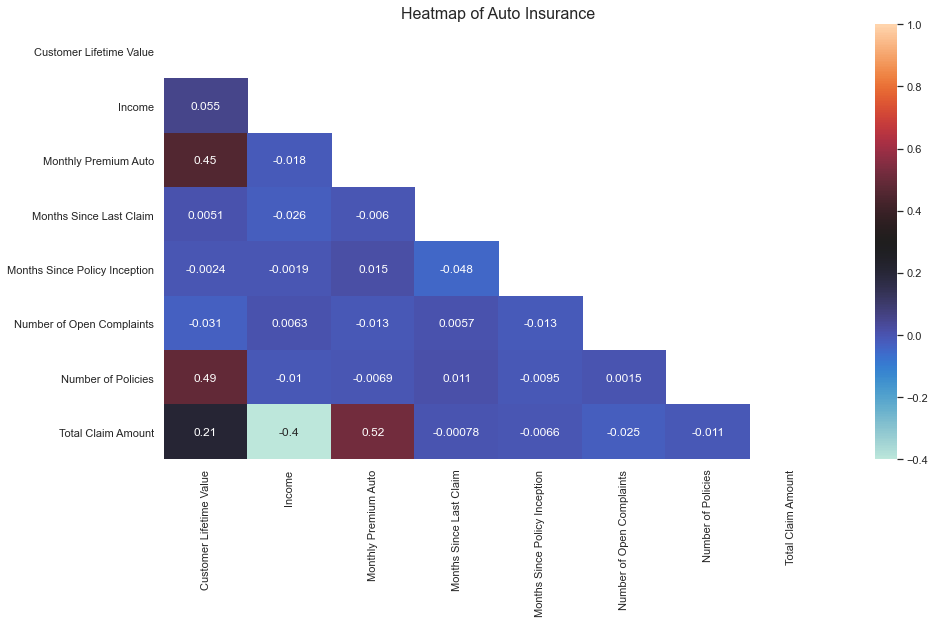

In [21]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(Data.corr()) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 8))
plt.title('Heatmap of Auto Insurance', size=16)
sns.heatmap(Data.corr(method='spearman'), cmap='icefire', annot=True, mask=mask, vmax=1);

Summary:
1. Correlation between Monthly Premium Auto and Total Claim is quite big
2. There is no strong correlation between income and Total Claim or Month Premium Auto

# 3.2 Modeling - **Monthly Premium Auto**



## 3.2.1 Library

In [8]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# linear regression model
import statsmodels.api as sm
from statsmodels.api import OLS

# non-linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# hyperparameter tuning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Save Model
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

## 3.2.2 Data Preprocessing

In [9]:
# import dataset
df = pd.read_csv('AutoInsurance.csv')

### Features Selection

> In deciding which feature is to be used as the model feature, we will use insurance business domain knowledge by **assuming as if we were the employee who handle new customers**. The data that can be collected from new customers will be treated as independent variable (X) and amount of premium to be paid every month is dependent variable (y).

> **Independent Variable Decision (X)**:
1. **Customer** : No
2. **State** : Yes
3. **Customer Lifetime Value** : No
4. **Response** : No
5. **Coverage** : No
6. **Education** : Yes
7. **Effective To Date** : No
8. **EmploymentStatus** : Yes
9. **Gender** : Yes
10. **Income** : Yes
11. **Location Code** : Yes
12. **Marital Status** : Yes
13. **Monthly Premium Auto** : No (target/dependent variable)
14. **Months Since Last Claim** : No
15. **Months Since Policy Inception** : No
16. **Number of Open Complaints** : No
17. **Number of Policies** : No
18. **Policy Type** : Yes
19. **Policy** : No (variable is the same as 'Policy Type' variable)
20. **Renew Offer Type** : No
21. **Sales Channel** : Yes
22. **Total Claim Amount** : No
23. **Vehicle Class**	: Yes
24. **Vehicle Size** : Yes

> **Independent variables** that will be included in the model as the feature are:
State, Education, EmploymentStatus, Gender, Income, Location Code, Marital Status, Policy Type, Sales Channel, Vehicle Class, Vehicle Size

### Dummy Variables

> Dummy variables is used to convert categorical variable to numeric variable which has the value of 0 (no) or 1 (yes)

In [10]:
# Select Features
df_features = df[['State',
                  'Education',
                  'EmploymentStatus',
                  'Gender',
                  'Income',
                  'Location Code',
                  'Marital Status',
                  'Policy Type',
                  'Sales Channel',
                  'Vehicle Class',
                  'Vehicle Size']]

In [11]:
# apply dummy variables for categorical variable
df_pre = pd.get_dummies(df_features)

In [12]:
# Final check for data preprocessing
df_pre

,Income,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,48767,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,43836,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,0,1,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,21604,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9132,21941,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


# 3.2.3 Linear Regression Method

## Ordinary Least Squares (OLS) Modeling

In [13]:
# Define features and target
X = df_pre
y = df['Monthly Premium Auto']

In [14]:
# Features name
features_name = df_pre.columns
features_name

Index(['Income', 'State_Arizona', 'State_California', 'State_Nevada',
       'State_Oregon', 'State_Washington', 'Education_Bachelor',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car

In [15]:
# OLS Modeling
ols_model_premium = OLS(y, sm.add_constant(X))
result_premium = ols_model_premium.fit()

In [16]:
print(result_premium.summary())

                             OLS Regression Results                             
Dep. Variable:     Monthly Premium Auto   R-squared:                       0.770
Model:                              OLS   Adj. R-squared:                  0.769
Method:                   Least Squares   F-statistic:                     1015.
Date:                  Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                          10:16:55   Log-Likelihood:                -38570.
No. Observations:                  9134   AIC:                         7.720e+04
Df Residuals:                      9103   BIC:                         7.742e+04
Df Model:                            30                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

> Keynote :
1. Adj. R-Squared = 0.769 = 76.9%. This means the model can explain 76.9% of the monthly premium auto variation. The remaining can be explained by other variables not in the model. 
2. Based on the p-value in each of the feature, there is a non-significant feature (more than 0.05), that is Income.

### Normality Test

In [42]:
result_premium.resid

0      -10.069631
1       16.218920
2       28.321988
3      -13.643012
4       -3.444972
          ...    
9129    -1.615135
9130    -1.115124
9131     7.675564
9132    18.259677
9133     0.529480
Length: 9134, dtype: float64

Text(0.5, 0, 'Residuals')

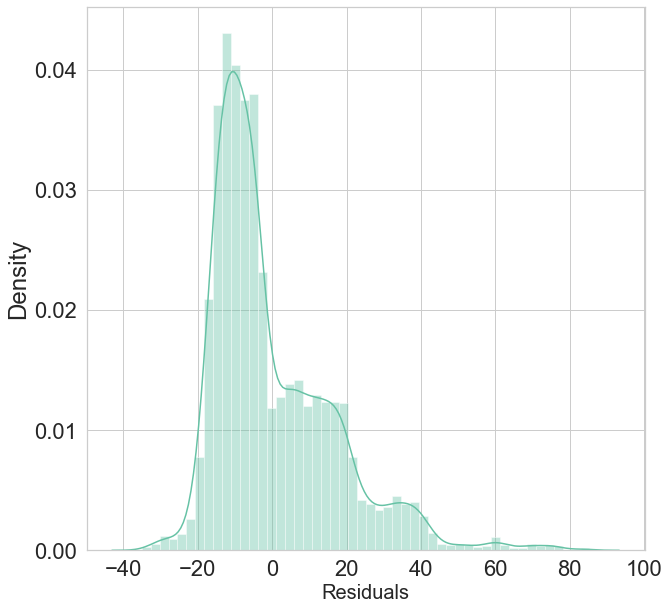

In [43]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result_premium.resid)
plt.xlabel('Residuals', fontsize = 20)

> Based on the above normality test, residuals is visibly has a non-normal distribution, therefore using non-linear regression modeling.

### QQ plot

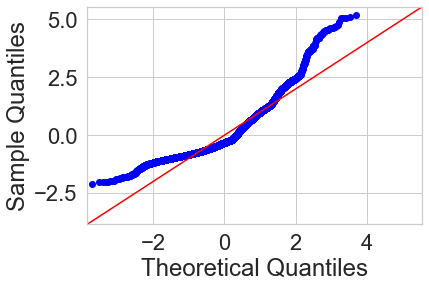

In [44]:
sm.qqplot(result_premium.resid, line = '45', fit = True)
plt.show()

> In the qqplot, data spread is leaning to the right side and shows non-normal.


### Residual Analysis Gauss-Markov Assumption

Text(0, 0.5, 'residual')

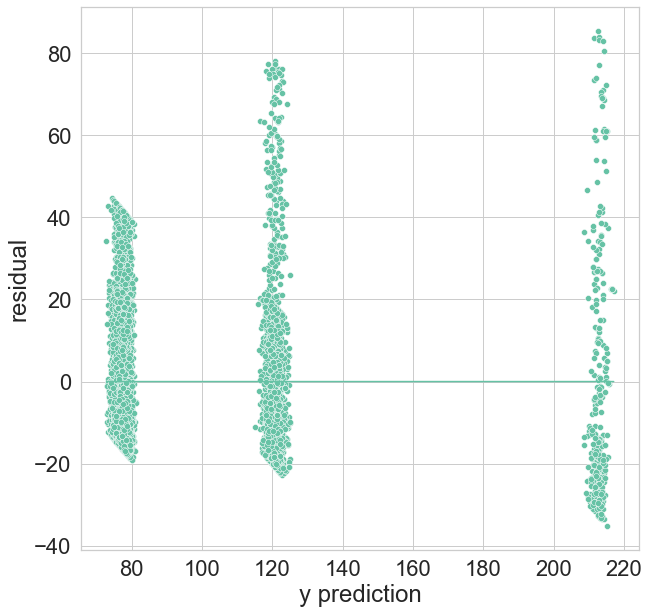

In [48]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = result_premium.fittedvalues, y = result_premium.resid)
sns.lineplot(result_premium.fittedvalues, 0)
plt.xlabel('y prediction')
plt.ylabel('residual')

> Based on the scatter plot result, the interpretation is:  
1. Residual not spreading around 0 value. This indicates that the assumption of 0 of average error is not met.
2. When the prediction value increases, the error spreads wider. This indicates violating the assumption of homogeneity.

# 3.2.4 Non-Linear Regression Methods

> After we fail to create model using linear regression (some assumptions of linear regression are not met), other method that can be used is using non-linear regression. This method will involve several models simultaneously and will choose which method has the best score.

## Model Selection

In [20]:
# Splitting Data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

In [21]:
# model
ranfor = RandomForestRegressor(random_state = 2020)
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor(random_state = 2020)
xgboost = XGBRegressor(random_state = 2020)

In [22]:
# cross validation
ranfor_cv = cross_val_score(ranfor, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
knnreg_cv = cross_val_score(knnreg, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
treereg_cv = cross_val_score(treereg, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')
xgboost_cv = cross_val_score(xgboost, X_train_val, y_train_val, cv = 5, scoring = 'neg_mean_absolute_error')

In [52]:
# Cross Validation Score
print('Cross validation score')
print('CV ranfor',ranfor_cv)
print('CV knnreg',knnreg_cv)
print('CV treereg',treereg_cv)
print('CV xgboost',xgboost_cv)

Cross validation score
CV ranfor [-12.72585913 -12.69135774 -12.28180356 -12.76415316 -12.38303372]
CV knnreg [-23.51381669 -22.77811218 -22.48227242 -23.52498289 -22.94880219]
CV treereg [-15.80090059 -15.80786594 -14.89961214 -15.46205524 -15.89583456]
CV xgboost [-12.83772091 -12.65960694 -12.40578662 -12.81050482 -12.47870427]


In [53]:
# Cross Validation Score Standard Deviation
print('Standard deviation from cross validation')
print('CV ranfor',ranfor_cv.std())
print('CV knnreg',knnreg_cv.std())
print('CV treereg',treereg_cv.std())
print('CV xgboost',xgboost_cv.std())

Standard deviation from cross validation
CV ranfor 0.1973453413410344
CV knnreg 0.4116339272367053
CV treereg 0.3679898017332322
CV xgboost 0.17286429141704646


In [54]:
# Cross Validation Score Mean
print('Average of cross validation result')
print('CV ranfor',ranfor_cv.mean())
print('CV knnreg',knnreg_cv.mean())
print('CV treereg',treereg_cv.mean())
print('CV xgboost',xgboost_cv.mean())

Average of cross validation result
CV ranfor -12.56924146273184
CV knnreg -23.04959727188712
CV treereg -15.57325369166285
CV xgboost -12.638464712910324


> Based on the modeling result using cross validation = 5, we found the model with the lowest average MAE score is model **Random Forest Regressor with the average MAE of 12.56 with the indication of low variance (0.19).** 

> Therefore, the model that will be used next is Random Forest Regressor model with hyperparameter tuning to find a better score.

## Random Forest

### Hyperparameter Tuning

In [23]:
ranfor = RandomForestRegressor()

> First, we look at the default parameter that will be used for Random Forest Regressor.

In [56]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ranfor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


> Parameter in Random Forest Regressor is many and we can do parameter tuning that matches with our goal. In this case, we will only change some of the parameters in the Random Forest Regressor, such as:
1. **n_estimators** = Shows how many trees in the forest
2. **max_features** = Number of feature that can be considered when searching for the best separation
3. **max_depth** = Shows the maximum depth of the tree 
4. **min_samples_split** = Minimum sample needed to split 
5. **min_samples_leaf** = Minimum sample needed in the model's leaf
6. **bootstrap** = Whole dataset used to build every tree

In [57]:
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


> In this hyperparameter tuning, we use RandomizedSearchVC method to find the best parameter randomly (100 different combinations) with cross validation = 3.

In [58]:
# search across 100 different combinations, and use all available cores
ranfor_random = RandomizedSearchCV(estimator = ranfor, 
                                   param_distributions = random_grid, 
                                   n_iter = 100, # 100 random combination
                                   cv = 3, 
                                   verbose = 2,
                                   scoring = 'neg_mean_absolute_error', 
                                   random_state = 2020, 
                                   n_jobs = -1)

In [59]:
# Fit the random search model
ranfor_random.fit(X_train_val, y_train_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=2020, scoring='neg_mean_absolute_error',
                   verbose=2)

In [60]:
# best parameter tuning
ranfor_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [61]:
# best score MAE
ranfor_random.best_score_

-12.532424850171049

In [72]:
# RandomizedCV Result Data rank test score 1-10
pd.set_option('max_colwidth', None)
random_resultcv = pd.DataFrame(ranfor_random.cv_results_).sort_values(['rank_test_score'], ascending = True)
random_resultcv.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
27,24.197222,0.209036,1.912028,0.035172,1800,5,2,sqrt,110,False,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}",-12.486524,-12.625540,-12.485210,-12.532425,0.065844,1
95,5.277328,0.168480,0.467993,0.039247,400,2,2,sqrt,60,False,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}",-12.495885,-12.616022,-12.486165,-12.532691,0.059058,2
42,19.361937,0.633774,1.796118,0.403115,1200,2,2,sqrt,30,False,"{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.485268,-12.623263,-12.490324,-12.532952,0.063893,3
10,21.230071,0.434293,1.537485,0.037203,1400,2,2,sqrt,90,False,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}",-12.479570,-12.647304,-12.482413,-12.536429,0.078409,4
31,18.518052,0.086199,1.498979,0.049106,1400,5,2,sqrt,50,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",-12.492563,-12.642884,-12.487740,-12.541062,0.072026,5
49,19.411719,0.577745,1.381715,0.031295,1400,5,2,sqrt,30,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.491158,-12.639273,-12.495032,-12.541821,0.068927,6
78,17.420159,0.636392,0.497309,0.065963,400,2,2,auto,70,True,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.444919,-12.629910,-12.554058,-12.542962,0.075929,7
1,25.233187,0.545252,0.651532,0.050290,600,5,2,auto,100,True,"{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.457885,-12.638770,-12.536529,-12.544395,0.074055,8
64,59.886764,0.711174,2.088516,0.556096,1400,2,2,auto,100,True,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.470308,-12.632759,-12.532710,-12.545259,0.066911,9
66,75.881870,2.426062,2.097735,0.103201,1800,5,2,auto,None,True,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}",-12.460267,-12.643223,-12.536303,-12.546598,0.075045,10


In [73]:
# Save randomizedcv tuning result to csv
random_resultcv.to_csv('RandomCV_Result_MonthlyPremiumAuto.csv')

In [76]:
# Load hasil randomizedcv dan show top 10 best score test
random_resultcv = pd.read_csv('RandomCV_Result_MonthlyPremiumAuto.csv')
pd.set_option('max_colwidth', None)
random_resultcv.sort_values(['rank_test_score'], ascending = True)
random_resultcv.head(10)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,27,24.197222,0.209036,1.912028,0.035172,1800,5,2,sqrt,110.0,False,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}",-12.486524,-12.625540,-12.485210,-12.532425,0.065844,1
1,95,5.277328,0.168480,0.467993,0.039247,400,2,2,sqrt,60.0,False,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}",-12.495885,-12.616022,-12.486165,-12.532691,0.059058,2
2,42,19.361937,0.633774,1.796118,0.403115,1200,2,2,sqrt,30.0,False,"{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.485268,-12.623263,-12.490324,-12.532952,0.063893,3
3,10,21.230071,0.434293,1.537485,0.037203,1400,2,2,sqrt,90.0,False,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}",-12.479570,-12.647304,-12.482413,-12.536429,0.078409,4
4,31,18.518052,0.086199,1.498979,0.049106,1400,5,2,sqrt,50.0,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}",-12.492563,-12.642884,-12.487740,-12.541062,0.072026,5
5,49,19.411719,0.577745,1.381715,0.031295,1400,5,2,sqrt,30.0,False,"{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}",-12.491158,-12.639273,-12.495032,-12.541821,0.068927,6
6,78,17.420159,0.636392,0.497309,0.065963,400,2,2,auto,70.0,True,"{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}",-12.444919,-12.629910,-12.554058,-12.542962,0.075929,7
7,1,25.233187,0.545252,0.651532,0.050290,600,5,2,auto,100.0,True,"{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.457885,-12.638770,-12.536529,-12.544395,0.074055,8
8,64,59.886764,0.711174,2.088516,0.556096,1400,2,2,auto,100.0,True,"{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}",-12.470308,-12.632759,-12.532710,-12.545259,0.066911,9
9,66,75.881870,2.426062,2.097735,0.103201,1800,5,2,auto,NaN,True,"{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}",-12.460267,-12.643223,-12.536303,-12.546598,0.075045,10


## Compare Before and After Hyperparameter Tuning

In [24]:
# Data splitting for benchmarking
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 0.25, 
    random_state = 2020
)

### Before Tuning

In [78]:
ranfor = RandomForestRegressor(random_state = 2020) 
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_val) 
score_before = mean_absolute_error(y_val, y_pred)
print('MAE score model before tuning =', score_before)

MAE score model before tuning = 12.420616468658752


> **Random Forest Regressor Model before tuning (using default parameter) has MAE score of 12.42**

### After Tuning

In [27]:
ranfor_after = RandomForestRegressor(bootstrap = False,
                                     max_depth = 90,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 2,
                                     min_samples_split = 2,
                                     n_estimators = 1400,
                                     random_state = 2020) # with best parameter after tuning
ranfor_after.fit(X_train,y_train)
y_pred_after = ranfor_after.predict(X_val)
score_after = mean_absolute_error(y_val, y_pred_after)
print('MAE score model after tuning =', score_after)

MAE score model after tuning = 12.277389086309286


> **Random Forest Regressor model after tuning using randomizedcv, the model now has a better MAE score of 12.27**

### Model Improvement

In [80]:
improvement = abs(100 *((score_after - score_before) / score_before))
improvement

1.15314229942511

> **An improvement to the random forest model from before and after tuning for 1.15%**

## Features Importances

> Next we see the features' importance value from each of the feature we inserted into the model and we decide which feature is affecting the most in predicting the monthly premium of new customers.

In [81]:
# Create an importance table variable
importance_table_premium = pd.DataFrame({
    'imp':ranfor_after.feature_importances_
}, index = features_name)

importance_table_premium.sort_values(['imp'], ascending= False)

,imp
Vehicle Class_Luxury Car,0.210860
Vehicle Class_Luxury SUV,0.192581
Vehicle Class_Four-Door Car,0.172443
Vehicle Class_SUV,0.124330
Vehicle Class_Two-Door Car,0.107071
Vehicle Class_Sports Car,0.041383
Income,0.034404
Sales Channel_Agent,0.005736
Gender_F,0.005211
Gender_M,0.005109


<AxesSubplot:>

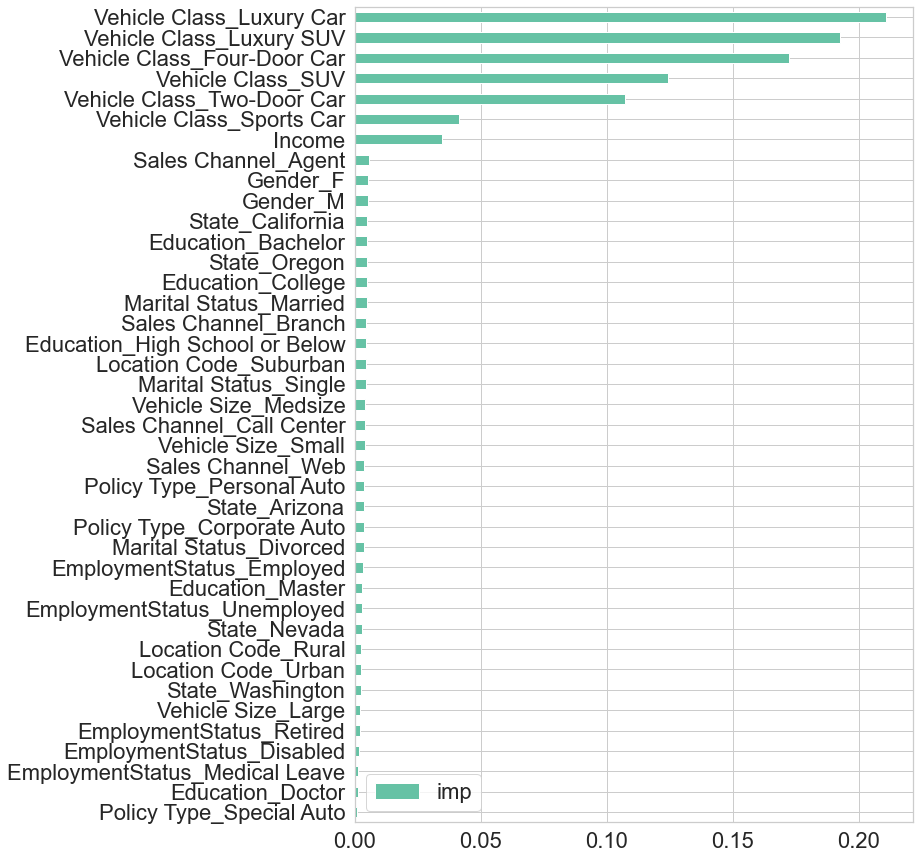

In [82]:
importance_table_premium.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

> From the feature importance result above, we can see which feature in overall has the most influence against the customer's monthly premium:
1. **Vehicle Class = 83%**
2. **Income = 3%**
3. **Other feature each has <1%**

# 3.2.5 Model Fitting to Data Test

> Next is the model fitting against test data to see whether the model is overfitting

In [26]:
# Model Fitting
ranfor_after.fit(X_train_val,y_train_val) 
y_pred_test = ranfor_after.predict(X_test) 
print('MAE model score after tuning on test data =', mean_absolute_error(y_test, y_pred_test))

MAE model score after tuning on test data = 11.90669713534968


> From MAE score on the fitting data test model, the MAE score is **11.90**, not far different if we compare with the fitting validation data MAE score **12.27**.

> Based on these two results, we can assume **model is not overfitting**.

# 3.2.6 Model Deployment

## Save Model


In [60]:
model_final_premium = ranfor_after.fit(X_train, y_train)

pickle.dump(model_final_premium, open('MonthlyPremiumAuto.sav', 'wb'))

**Model has been saved with the format .sav and we can use this model to predict the monthly premium auto of new customers by calling the model 'MonthlyPremiumAuto.sav'**

## Load Model

In [61]:
filename = 'MonthlyPremiumAuto.sav'
loaded_model_premium = pickle.load(open(filename, 'rb'))

In [62]:
loaded_model_premium.predict(X_test)

array([122.66012676,  78.82769469,  74.0813593 , ...,  79.91321055,
        81.68102151, 122.68684496])

In [63]:
mean_absolute_error(y_test, loaded_model_premium.predict(X_test))

12.076746608306689

# 3.3 Modeling - **Total Claim Amount**

> After we acquire prediction number of Monthly Premium Auto, the enxt step is to predict the Total Claim Amount. The goal is to predict the Total Claim Amount based on the customer's profile and Monthly Premium Auto as well that was decided from model.

> Company will be able to predict total claim of a customer so the company would know how big is the CLV (Customer Lifetime Value) of a customer compared to the total claim, whether the CLV is higher than the total claim (profit) or lower than the total colaim (loss).

## 3.3.1 Data Preprocessing

### Features Selection

> Feature will be used to predict **Total Claim Amount**:
1. Income
2. State
3. EmploymentStatus
4. Gender
5. Location Code
6. Marital Status
7. Sales Channel
8. Vehicle Class
9. Vehicle Size
10. Policy Type
11. **Coverage**
12. Education
13. **Monthly Premium Auto**

> The feature will be used is the same as Monthly Premium Auto prediction, the difference is adding **Coverage** and **Monthly Premium Auto** features.

### Dummy Variables

> Dummy variables is used to change categorical variable to numeric variable which has 0 (no) or 1 (yes).

In [28]:
# Select Features
df_features_claim = df[['Total Claim Amount',
                  'Income',
                  'State',
                  'EmploymentStatus',
                  'Gender',
                  'Location Code',
                  'Marital Status',
                  'Sales Channel',
                  'Vehicle Class',
                  'Vehicle Size',
                  'Policy Type',
                  'Coverage',
                  'Education',
                  'Monthly Premium Auto'
                  ]]

In [29]:
df_dummy_claim = pd.get_dummies(df_features_claim)

In [30]:
df_dummy_claim.head()

,Total Claim Amount,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Policy Type_Personal Auto,Policy Type_Special Auto,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,384.811147,56274,69,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1131.464935,0,94,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,566.472247,48767,108,0,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,529.881344,0,106,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,138.130879,43836,73,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0


# 3.3.2 Linear Regression Method

## Ordinary Least Squares (OLS) Modeling

In [32]:
# Get features names
features_name_claim = df_dummy_claim.columns.drop('Total Claim Amount') # drop target

In [33]:
features_name_claim

Index(['Income', 'Monthly Premium Auto', 'State_Arizona', 'State_California',
       'State_Nevada', 'State_Oregon', 'State_Washington',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Sales Channel_Agent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car',
       'Vehicle Size_Large', 'Vehicle Size_Medsize', 'Vehicle Size_Small',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Coverage_Basic', 'Coverage_E

In [34]:
sm_lm_claim = OLS(df_dummy_claim['Total Claim Amount'], sm.add_constant(df_dummy_claim[features_name_claim]))
result_claim = sm_lm_claim.fit()

In [162]:
print(result_claim.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     928.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:55:39   Log-Likelihood:                -58033.
No. Observations:                9134   AIC:                         1.161e+05
Df Residuals:                    9100   BIC:                         1.164e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Based on the result summary above, some keynotes can be summarized: 

1. R2 is 0.771 -> features can predict the Total Claim Amount for 77.1%
2. Based on the p-value on each feature, some features are not significant (more than 0.05), such as:
  - State_California
  - State_Nevada
  - State_Washington
  - EmploymentStatus_Medical Leave
  - Gender_M
  - Sales Channel_Branch
  - Sales Channel_Web
  - Vehicle Class_Four-Door Car
  - Vehicle Class_Luxury Car
  - Vehicle Class_Luxury SUV
  - Vehicle Class_Two-Door Car
  - Vehicle Size_Large 
  - Vehicle Size_Small 
  - Policy Type_Special Auto
  - Coverage_Basic  
  - Coverage_Premium
  - Education_Bachelor

### Normality Test

Text(0.5, 0, 'Residuals')

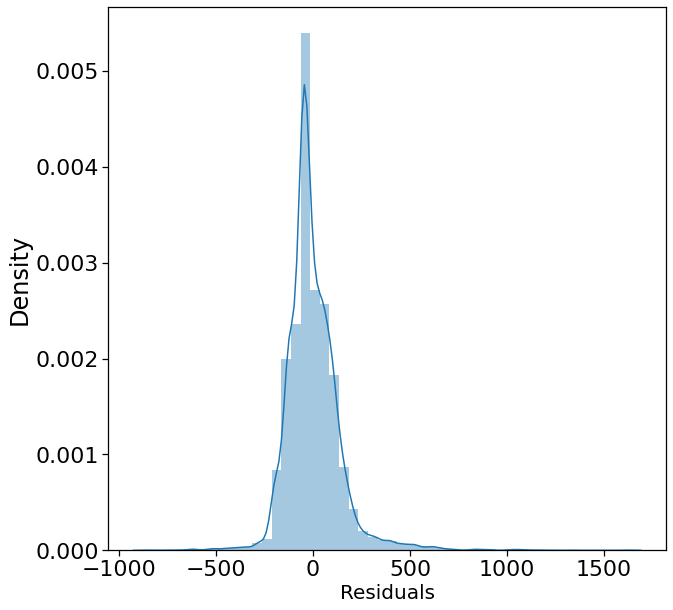

In [163]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result_claim.resid)
plt.xlabel('Residuals', fontsize = 20)

### QQ Plot

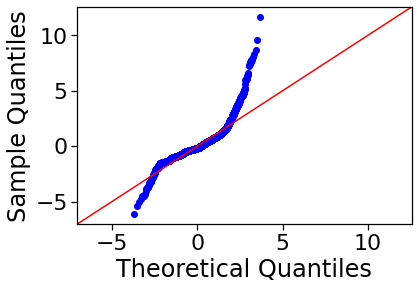

In [164]:
sm.qqplot(result_claim.resid, line = '45', fit = True)
plt.show()

### Residual Analysis Gauss-Markov Assumption

Text(0, 0.5, 'Residuals')

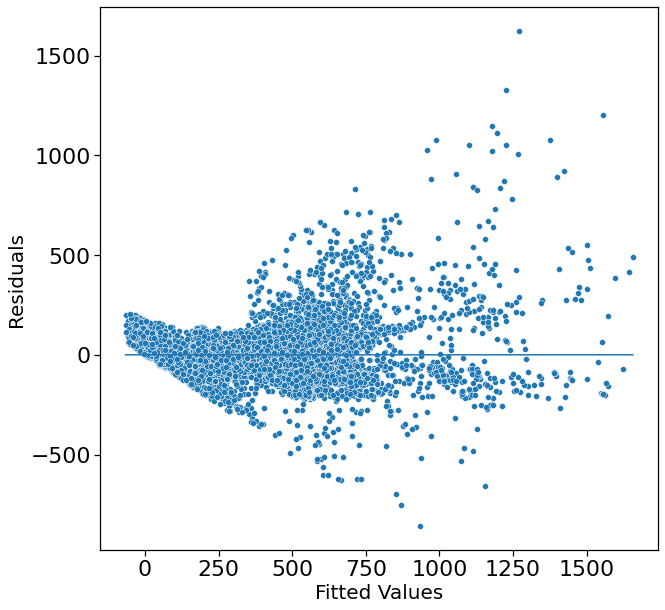

In [165]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result_claim.fittedvalues,result_claim.resid)
sns.lineplot(result_claim.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

**Summary Normality Assumption & Gauss-Markov**

- Data has no normality residual, modeling has to use non linear regression
- in the qqplot, there's a deviation in X-axis (Theoretical Quantilers) closer to -5 or 5
- Based on Gauss-Markov assumption, variants error in the the data tend to non-constant if the observation value is higher

# 3.3.3 Non-Linear Regression Methods

## Data Splitting & Scaling

In [35]:
X_claim = df_dummy_claim[features_name_claim]
y_claim = df_dummy_claim['Total Claim Amount'].astype(int)

In [36]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_claim, 
    y_claim, 
    test_size = 0.2, 
    random_state = 2021)

In [37]:
scaler = RobustScaler()
scaler.fit(X_train_val)
X_train_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

Scaler is used for scaling feature with numeric data such as Income and Monthly Premium Auto.

Scaler that is used is Robust Scaler because AutoInsurance data is not normal and has outlier, so it is not suitable to use Standard Scaler and Min Max Scaler.

## Model Selection

In [38]:
# model
ranfor = RandomForestRegressor(n_estimators = 20, max_features = 4, max_depth = 3, random_state = 2021)
knnreg = KNeighborsRegressor(weights = 'uniform')
treereg = DecisionTreeRegressor(max_depth = 3, random_state = 2021)
xgboost = XGBRegressor(random_state = 2021)

In [39]:
# cross validation
skfold = StratifiedKFold(n_splits = 5)

ranfor_cv = cross_val_score(ranfor, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
knnreg_cv = cross_val_score(knnreg, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
treereg_cv = cross_val_score(treereg, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')
xgboost_cv = cross_val_score(xgboost, X_train_scaled, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error')

In [40]:
# Cross Validation Score
print('Cross validation Result')
print('CV ranfor',ranfor_cv)
print('CV knnreg',knnreg_cv)
print('CV treereg',treereg_cv)
print('CV xgboost',xgboost_cv)

Cross validation Result
CV ranfor [-145.74709936 -143.0737574  -151.43148456 -147.26028741 -150.82093288]
CV knnreg [-90.85827633 -93.81627907 -92.81232033 -92.41492129 -92.64873374]
CV treereg [-102.92738748 -101.12155906 -103.69361232  -99.61427059 -103.53455224]
CV xgboost [-76.85076711 -80.43856961 -78.63384069 -80.66642105 -79.01264919]


In [41]:
# Cross Validation Score Standard Deviation
print('Cross Validation Standard Deviation')
print('CV ranfor',ranfor_cv.std())
print('CV knnreg',knnreg_cv.std())
print('CV treereg',treereg_cv.std())
print('CV xgboost',xgboost_cv.std())

Cross Validation Standard Deviation
CV ranfor 3.1326649157700235
CV knnreg 0.9543836352090204
CV treereg 1.574018539615621
CV xgboost 1.3803866028473637


In [42]:
# Cross Validation Score Mean
print('Cross Validation Average Result')
print('CV ranfor',ranfor_cv.mean())
print('CV knnreg',knnreg_cv.mean())
print('CV treereg',treereg_cv.mean())
print('CV xgboost',xgboost_cv.mean())

Cross Validation Average Result
CV ranfor -147.66671232089462
CV knnreg -92.51010615257994
CV treereg -102.17827633794575
CV xgboost -79.12044952811155


**Summary Model Selection**

- Based on the mean, the selected model is XGBoost Regressor
- Metric used is MAE because the data has outlier
- XGBoost Regressor mean -> -78.505 (the best, the closest to 0)
- XGBoost Regressor std dev -> 1.380 (indicates low variance)

## XGBoost Regressor Fitting Model

In [43]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 0.25, 
    random_state = 2021)

In [44]:
model = XGBRegressor(random_state = 2021)

In [45]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### Hyperparameter Tuning

In [179]:
hyperparam_max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
hyperparam_n_estimator = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
skfold = StratifiedKFold(n_splits = 5)
 
best_score = -1000 
cv_score_validation_fold = [] 
 
for i in hyperparam_max_depth:
  for a in hyperparam_n_estimator:
    xgboost = XGBRegressor(max_depth = i, n_estimators = a, random_state = 2021)
    cv_score = cross_val_score(xgboost, X_train_val, y_train_val, cv = skfold, scoring = 'neg_mean_absolute_error').mean() 
    cv_score_validation_fold.append(cv_score)
 
    if cv_score > best_score: 
      best_score = cv_score 
      best_params_max_depth = {'max depth':i}
      best_params_n_estimator = {'n estimator':a}

[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [180]:
best_params_max_depth

{'max depth': 10}

In [181]:
best_params_n_estimator

{'n estimator': 30}

In [182]:
best_score

-73.8686805440061

In [183]:
print('best param max depth:', best_params_max_depth)
print('best param n estimator:', best_params_n_estimator)

best param max depth: {'max depth': 10}
best param n estimator: {'n estimator': 30}


**Summary Hyperparameter Tuning**

- Besy parameter max depth -> 10
- Best parameter n estimator -> 30

## 3.3.4 Model Before Tuning

In [194]:
xgboost_before = XGBRegressor(max_depth = 3, n_estimators = 10, random_state = 2020) 
model_1 = xgboost_before
xgboost_before.fit(X_train_val,y_train_val) 
y_pred = xgboost_before.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

[08:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
153.61604257718292


In [195]:
importance_table = pd.DataFrame({
    'imp':model_1.feature_importances_
}, index = features_name_claim)

In [207]:
importance_table.sort_values(['imp'], ascending= False)

,imp
Location Code_Suburban,0.823531
Location Code_Rural,0.124382
Monthly Premium Auto,0.015054
Marital Status_Single,0.012348
Policy Type_Personal Auto,0.001250
Income,0.001189
Vehicle Class_Luxury Car,0.001118
EmploymentStatus_Retired,0.001018
EmploymentStatus_Employed,0.000993
Coverage_Premium,0.000987


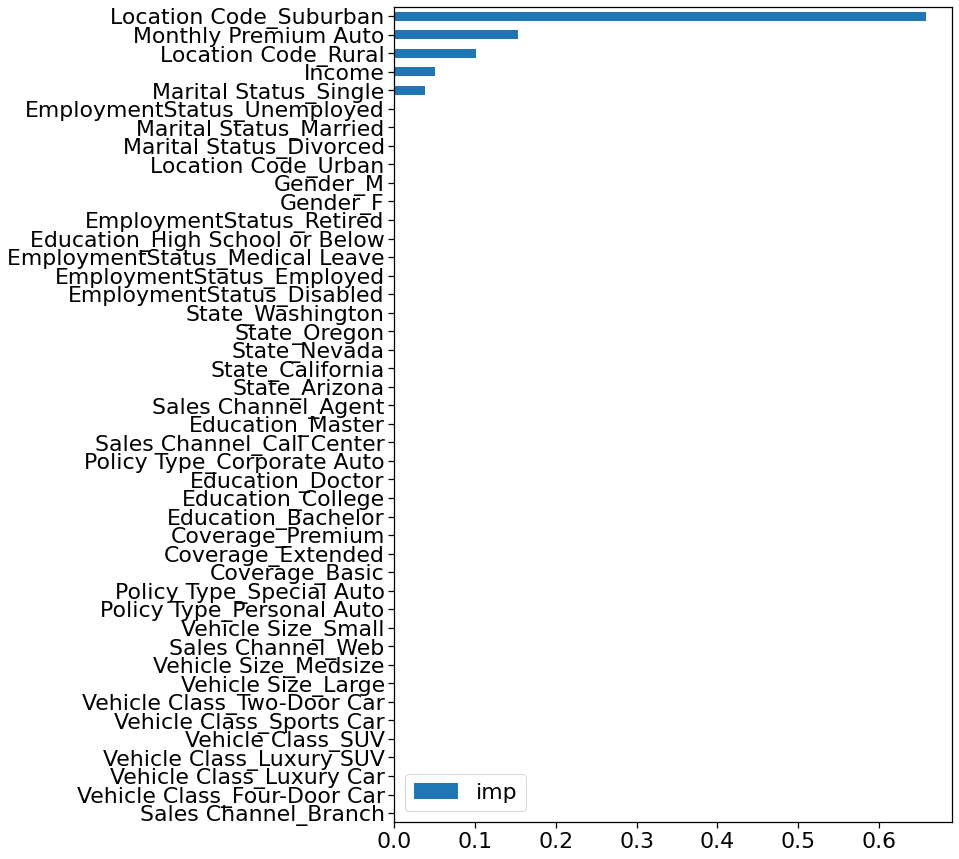

In [187]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

## 3.3.5 Model After Tuning

In [197]:
xgboost_after = XGBRegressor(max_depth = 10, n_estimators = 30, random_state = 2020) # best parameter
model_2 = xgboost_after
xgboost_after.fit(X_train_val,y_train_val) 
y_pred = xgboost_after.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

[08:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
72.1231644395015


In [208]:
importance_table = pd.DataFrame({
    'imp':model_2.feature_importances_
}, index = features_name_claim)

In [209]:
importance_table.sort_values(['imp'], ascending= False)

,imp
Location Code_Suburban,0.815104
Location Code_Rural,0.127143
Monthly Premium Auto,0.017107
Marital Status_Single,0.012750
EmploymentStatus_Employed,0.001565
Income,0.001296
Vehicle Size_Small,0.001282
Coverage_Extended,0.001272
Policy Type_Corporate Auto,0.001157
Vehicle Size_Large,0.000968


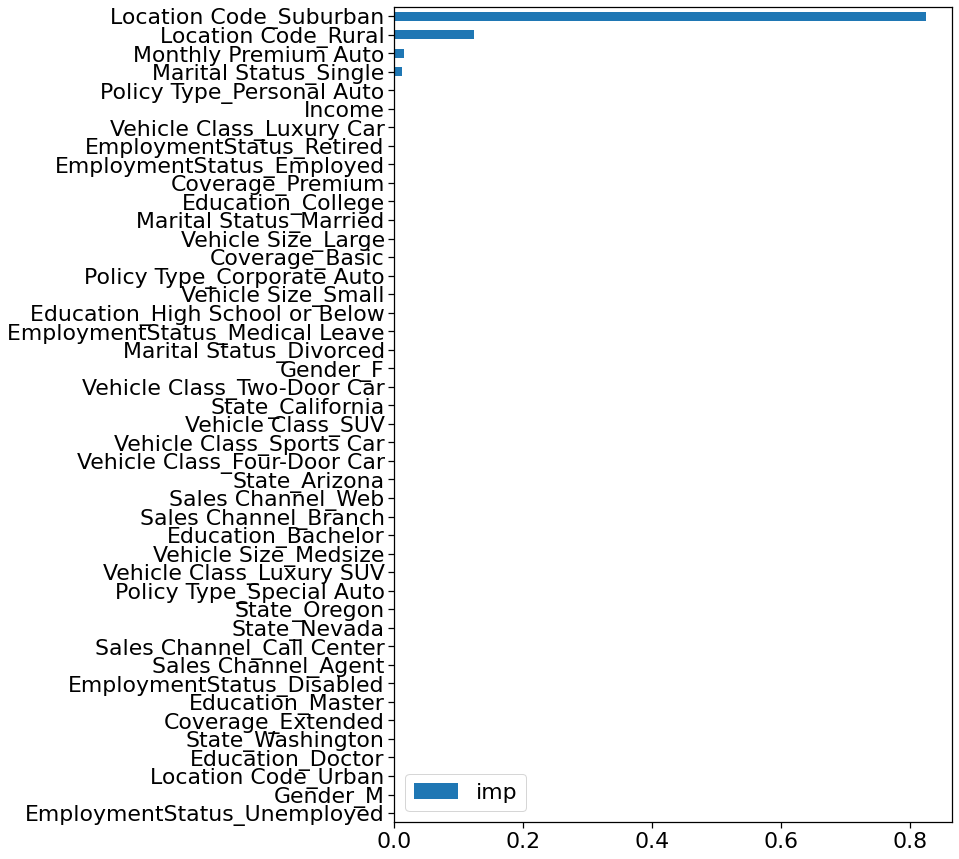

In [200]:
importance_table.sort_values(by = 'imp').plot(kind = 'barh', figsize = (10,15))

**Summary Model Before & After Tuning**

- Performance model after tuning is better than before tuning
- **MAE model after tuning -> 72.12** (lower than before tuing)
- Most dominant features importance model after tuning are Location Code_Suburban, followed by Location Code-Rural, Monthly Premium Auto, and Marital Status_Single
- These 4 features is important to predict Total Claim Amount, the sum of these features is 0.971 (97.1%)

## 3.3.6 Model Deployment

### Save File

In [201]:
model_final_claim = xgboost_after.fit(X_train, y_train)

pickle.dump(model_final_claim, open('TotalClaimAmount.sav', 'wb'))

[08:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Model has been saved with the format .sav and we can use this model to predict the new customer's insurance total claim with calling the model name 'TotalClaimAmount.sav'**

### Load File

In [204]:
filename = 'TotalClaimAmount.sav'
loaded_model_claim = pickle.load(open(filename, 'rb'))

[08:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [205]:
loaded_model_claim.predict(X_test)

array([ 191.4146 ,  363.36496,  402.40186, ...,  333.6904 , 1436.2297 ,
        240.05553], dtype=float32)

In [206]:
mean_absolute_error(y_test, loaded_model_claim.predict(X_test))

73.69702759060497